# World Internet Usage

## Objective:
How has global internet usage evolved over time, and what is the expected pattern of world internet growth from 2021 to 2031?
## About the dataset
Downloaded from Kaggal

## Approach to analysis
1. Analyse historical growth
Examine how internet usage has changed over time across continents, countries, and income groups to understand past growth patterns.

2. Measure growth in two ways
Linear growth to identify where the largest number of new users are being added each year.
Compound growth (CAGR) to compare how fast different regions and income groups are growing relative to their size.

3. Identify saturation vs. expansion markets.

4. Predict midterm growth
Apply Logistic Sigmoid Growth Model to capture rapid take-up and eventual saturation, providing realistic expectations for global internet growth.

5. Translate findings into business insight
Highlight regions, countries and income groups where future growth is most likely, helping businesses, investors, and policymakers focus on high-potential markets.

In [22]:
## Import libraries
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

In [23]:
## Import data
df = pd.read_csv(r'C:\Users\lakma\Documents\kaggal_data\number-of-internet-users.csv')

In [24]:
## Sense check

In [25]:
df.columns

Index(['country ', 'Year', 'Number of Internet users'], dtype='object')

In [26]:
# remove white spaces
df.columns = df.columns.str.strip()
df.columns

Index(['country', 'Year', 'Number of Internet users'], dtype='object')

In [27]:
# rename some columns
df = df.rename( columns= {'Year': 'year', 'Number of Internet users':'num_users'})
df.columns


Index(['country', 'year', 'num_users'], dtype='object')

In [28]:
df.describe()

,year,num_users
count,6893.000000,6.893000e+03
mean,2004.543160,2.967408e+07
std,10.240126,1.949894e+08
min,1960.000000,0.000000e+00
25%,1997.000000,5.972474e+03
50%,2005.000000,2.311677e+05
75%,2013.000000,3.625811e+06
max,2021.000000,5.016978e+09


In [29]:
df['country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe', 'European Unio

In [30]:
# Define categories
continent = [
    "Africa", "Asia", "Europe",
    "North America", "South America", "Oceania"
]

income_groups = [
    "High-income countries",
    "Low-income countries",
    "Lower-middle-income countries",
    "Upper-middle-income countries"
]

special_groups = [
    "European Union (27)",
    "World"
]

# Classification function
def classify(entry):
    if entry in continent:
        return "continent"
    elif entry in income_groups:
        return "income group"
    elif entry in special_groups:
        return "special group"
    else:
        return "country"

# Apply to country column
df['groups'] = df['country'].apply(classify)

#view df
df.head(5)

,country,year,num_users,groups
0,Afghanistan,1990,0.0,country
1,Afghanistan,1991,0.0,country
2,Afghanistan,1992,0.0,country
3,Afghanistan,1993,0.0,country
4,Afghanistan,1994,0.0,country


In [31]:
df.tail(5)

,country,year,num_users,groups
6888,Zimbabwe,2017,3614246.0,country
6889,Zimbabwe,2018,3758614.2,country
6890,Zimbabwe,2019,4060395.5,country
6891,Zimbabwe,2020,4549155.0,country
6892,Zimbabwe,2021,5499640.0,country


In [32]:
df['groups'].unique()

array(['country', 'continent', 'special group', 'income group'],
      dtype=object)

In [33]:
# filter by continent names
continents_list = df[df['groups'] == 'continent']['country'].unique()
print(continents_list)


['Africa' 'Asia' 'Europe' 'North America' 'Oceania' 'South America']


In [34]:
# filter by income groups
by_income_groups = df[df['groups'] == 'income group']['country'].unique()
by_income_groups

array(['High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'Upper-middle-income countries'],
      dtype=object)

In [35]:
# filter by sopecial groups
special_gps = df[df['groups'] == 'special group']['country'].unique()
special_gps

array(['European Union (27)', 'World'], dtype=object)

In [36]:
# filter by special groups
special_gps = df[df['groups'] == 'special group'][['year','country', 'num_users']]
special_gps

,year,country,num_users
2100,1990,European Union (27),2.808042e+05
2101,1991,European Union (27),6.129837e+05
2102,1992,European Union (27),1.151195e+06
2103,1993,European Union (27),1.761000e+06
2104,1994,European Union (27),3.338486e+06
...,...,...,...
6796,2017,World,3.482049e+09
6797,2018,World,3.799832e+09
6798,2019,World,4.198484e+09
6799,2020,World,4.698218e+09


In [37]:
# Filter only World data
world_df = df[df['country'] == 'World'].sort_values('year')
world_df.head(5)

,country,year,num_users,groups
6769,World,1990,2601283.5,special group
6770,World,1991,4270533.5,special group
6771,World,1992,6892746.5,special group
6772,World,1993,10009239.0,special group
6773,World,1994,20460824.0,special group


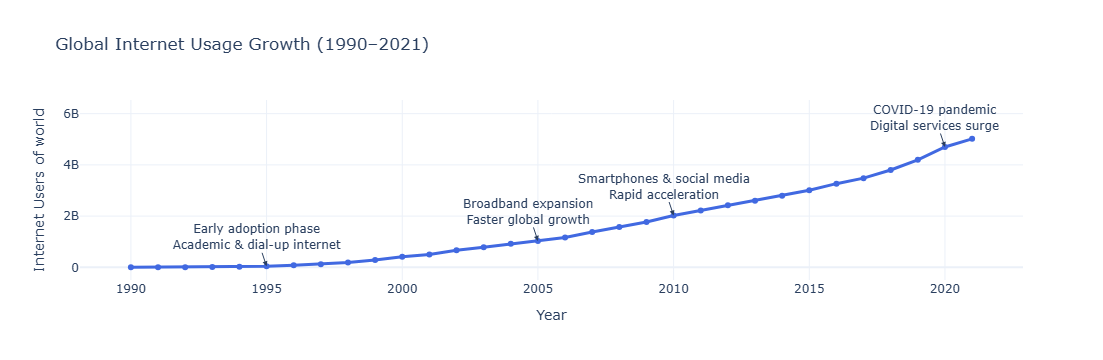

In [41]:
## Plot world internet usage
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=world_df['year'],
        y=world_df['num_users'],
        mode='lines+markers',
        name='World',
        line=dict(color='royalblue', width=3)
    )
)

# Years you want to annotate
annot_years = {
    1995: "Early adoption phase<br>Academic & dial-up internet",
    2005: "Broadband expansion<br>Faster global growth",
    2010: "Smartphones & social media<br>Rapid acceleration",
    2020: "COVID-19 pandemic<br>Digital services surge",
    2023: "Growth slowing<br>Market saturation in high-income regions"
}

annotations = []

for year, text in annot_years.items():
    # Check if the year exists in world_df
    if year in world_df['year'].values:
        y_value = world_df.loc[world_df['year'] == year, 'num_users'].values[0]
        annotations.append(dict(
            x=year,
            y=y_value,
            text=text,
            showarrow=True,
            arrowhead=2
        ))

fig.update_layout(
    title="Global Internet Usage Growth (1990–2021)",
    xaxis_title="Year",
    yaxis_title="Internet Users of world",
    template="plotly_white",
    annotations=annotations
)

fig.show()


## Calculate Annual Growth Rate and compound annual growth rate of internet users of the world
Linear growth shows the average number of new users added per year, which is useful for infrastructure planning and understanding absolute increases. CAGR shows the average percentage growth per year, allowing us to compare growth speed across regions or populations of different sizes. Using both together gives a complete picture of internet adoption, showing both how many people are joining and how fast the user base is growing.


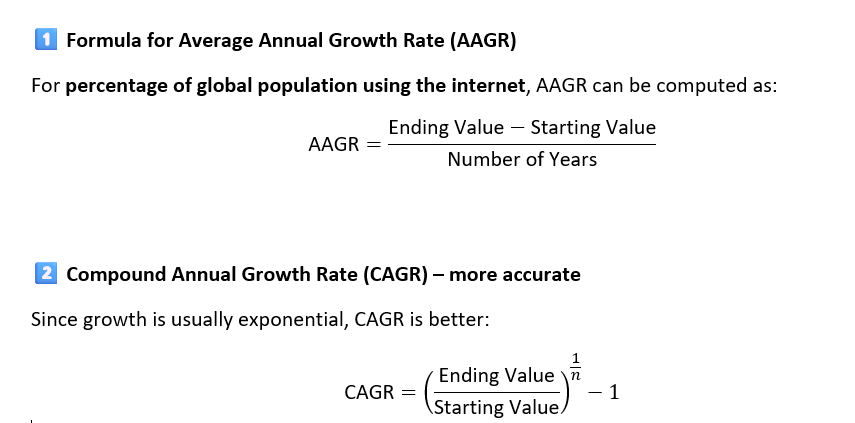

In [39]:
# World annual and compound growth rate of internet users
# Sort world data by year
world_data = world_df.sort_values('year')

# Starting value (1990)
start_value = world_data.loc[world_data['year'] == 1990, 'num_users'].values[0]

# Ending value (2021)
end_value = world_data['num_users'].iloc[-1]
end_year = world_data['year'].iloc[-1]

n_years = end_year - 1990

# Linear Average Annual Growth Rate (AAGR)
aagr = (end_value - start_value) / n_years

# Compound Annual Growth Rate (CAGR)
cagr = (end_value / start_value)**(1/n_years) - 1

print(f"Average Annual Growth Rate (linear) 1990–{end_year}: {aagr:.2f} users per year")
print(f"Compound Annual Growth Rate (CAGR) 1990–{end_year}: {cagr*100:.2f}% per year")


Average Annual Growth Rate (linear) 1990–2021: 161754087.63 users per year
Compound Annual Growth Rate (CAGR) 1990–2021: 27.64% per year


In [78]:
## Country-Level Adoption: “Which countries show the fastest increase in internet users over time?”
import numpy as np
import pandas as pd

# Sort data
df_sorted = df.sort_values(['country', 'year'])

def compute_growth(group):
# Keep only non-zero adoption years
    group = group[group['num_users'] > 0]

# If a country never adopted (or only one year), skip
    if len(group) < 2:
        return pd.Series({
            'linear_growth': np.nan,
            'cagr': np.nan,
            'start_year': np.nan
        })

    start_value = group['num_users'].iloc[0]
    end_value = group['num_users'].iloc[-1]
    start_year = group['year'].iloc[0]
    end_year = group['year'].iloc[-1]
    n_years = end_year - start_year

    # Safety check
    if n_years == 0:
        return pd.Series({
            'linear_growth': np.nan,
            'cagr': np.nan,
            'start_year': start_year
        })

    linear_growth = (end_value - start_value) / n_years
    cagr = (end_value / start_value)**(1 / n_years) - 1

    return pd.Series({
        'linear_growth': linear_growth,
        'cagr': cagr,
        'start_year': start_year
    })

# Apply per country
growth_df = (
    df_sorted
    .groupby('country', group_keys=False)
    .apply(compute_growth)
    .reset_index()
)
fastest_linear = growth_df.sort_values('linear_growth', ascending=False)
fastest_percent = growth_df.sort_values('cagr', ascending=False)

print("Top 10 by absolute growth (users per year):")
print(fastest_linear.head(10))

print("\nTop 10 by CAGR:")
print(fastest_percent.head(10))


Top 10 by absolute growth (users per year):
                           country  linear_growth      cagr  start_year
220                          World   1.617541e+08  0.276368      1990.0
11                            Asia   8.882219e+07  0.432000      1990.0
214  Upper-middle-income countries   6.876482e+07  0.481788      1991.0
118  Lower-middle-income countries   4.886256e+07  0.629449      1992.0
88           High-income countries   3.988056e+07  0.219630      1990.0
42                           China   3.721631e+07  0.599640      1993.0
93                           India   2.258334e+07  0.586655      1992.0
67                          Europe   2.111375e+07  0.269547      1990.0
1                           Africa   1.844008e+07  0.467750      1991.0
148                  North America   1.614363e+07  0.193484      1990.0

Top 10 by CAGR:
                           country  linear_growth      cagr  start_year
138                        Myanmar   1.068265e+06  0.785540      1999.0
66 

C:\Users\lakma\AppData\Local\Temp\ipykernel_22304\133623386.py:47: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [79]:
# Apply def classify 
fastest_percent['groups'] = fastest_percent['country'].apply(classify)

#view df
fastest_percent.head(5)

,country,linear_growth,cagr,start_year,groups
138,Myanmar,1.068265e+06,0.785540,1999.0,country
66,Ethiopia,7.844161e+05,0.748070,1995.0,country
219,Vietnam,2.936785e+06,0.717407,1996.0,country
221,Yemen,4.210115e+05,0.714144,1996.0,country
49,Cuba,3.042297e+05,0.685862,1995.0,country


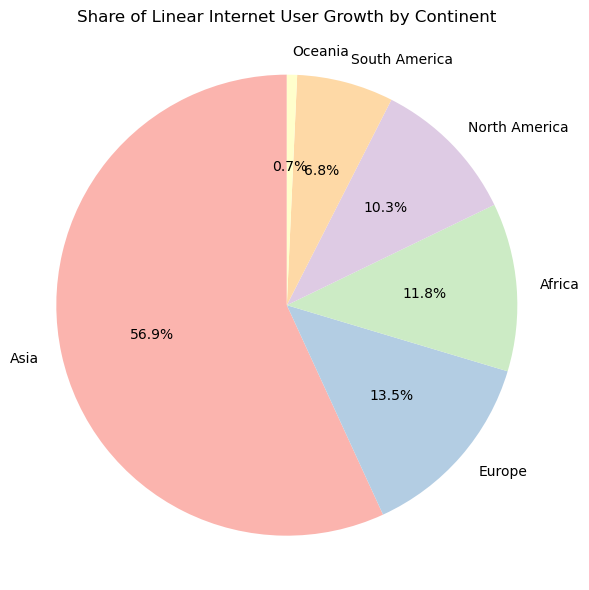

In [81]:
# Continent wise internet usage: Linear growth
# Filter only rows where groups = 'continent'
continents_usage = fastest_percent[fastest_percent['groups'] == 'continent']

# Sort by linear_growth descending
continents_usage = continents_usage.sort_values('linear_growth', ascending=False)

# Light pastel colors
colors = plt.cm.Pastel1.colors

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    continents_usage['linear_growth'],
    labels=continents_usage['country'],
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    colors=colors
)

# Title
plt.title('Share of Linear Internet User Growth by Continent')

# Keep pie circular
plt.axis('equal')

plt.tight_layout()
# plt.savefig('Share of Linear Internet User Growth by Continent')
plt.show()

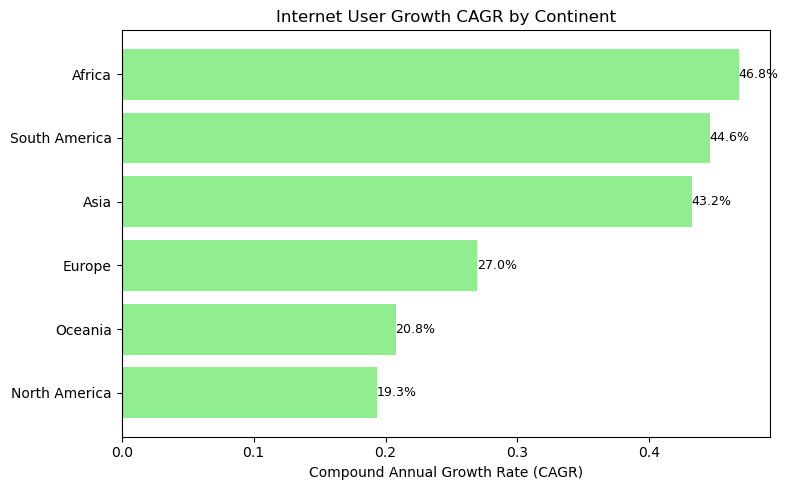

In [85]:
# Continent wise internet usage: compound growth
# Filter only rows where groups = 'continent'
continents_usage = fastest_percent[fastest_percent['groups'] == 'continent']

# Sort by linear_growth descending (optional, or just by cagr)
continents_usage = continents_usage.sort_values('cagr', ascending=False)

# Plot horizontal bar chart for CAGR
plt.figure(figsize=(8,5))
plt.barh(
    continents_usage['country'],  # 'country' column holds continent names
    continents_usage['cagr'],
    color='lightgreen'
)

# Highest CAGR on top
plt.gca().invert_yaxis()

# Labels and title
plt.xlabel('Compound Annual Growth Rate (CAGR)')
plt.title('Internet User Growth CAGR by Continent')

# Add CAGR values on bars (as percentages)
for index, value in enumerate(continents_usage['cagr']):
    plt.text(
        value,
        index,
        f'{value*100:.1f}%',
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.savefig('Internet User Growth CAGR by Continent')
plt.show()


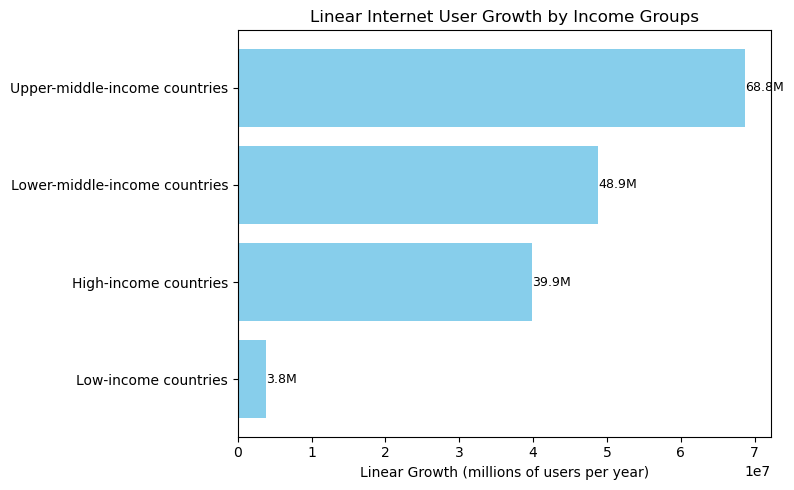

In [82]:
# Income group internet usage: Linear growth
# Filter only rows where groups = 'income group'
income_group_usage = fastest_percent[fastest_percent['groups'] == 'income group']

# Sort by linear_growth descending
income_group_usage = income_group_usage.sort_values('linear_growth', ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(
    income_group_usage['country'],
    income_group_usage['linear_growth'],
    color='skyblue'
)

# Largest growth on top
plt.gca().invert_yaxis()

# Labels and title
plt.xlabel('Linear Growth (millions of users per year)')
plt.title('Linear Internet User Growth by Income Groups')

# Add values on bars (formatted in millions)
for index, value in enumerate(income_group_usage['linear_growth']):
    plt.text(
        value,
        index,
        f'{value/1e6:.1f}M',
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.savefig('Linear Internet User Growth by Income Groups')
plt.show()


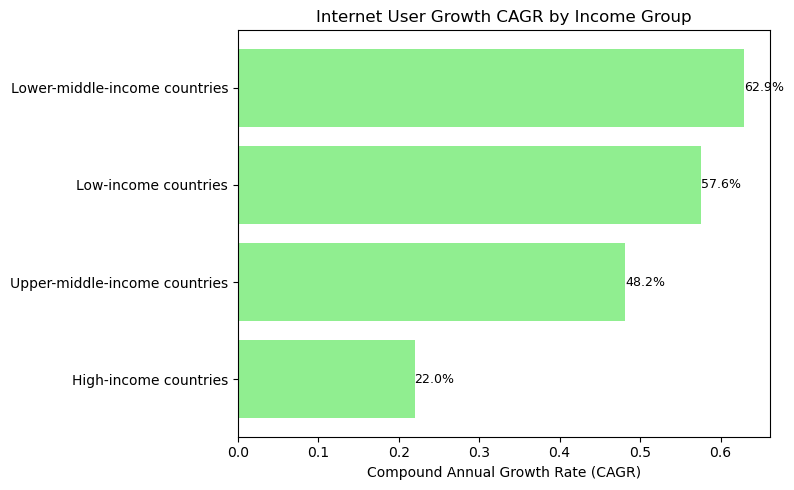

In [83]:
# Income group internet usage: Compound growth
# Sort by CAGR descending
income_group_usage = income_group_usage.sort_values('cagr', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(
    income_group_usage['country'],
    income_group_usage['cagr'],
    color='lightgreen'
)
plt.gca().invert_yaxis()
plt.xlabel('Compound Annual Growth Rate (CAGR)')
plt.title('Internet User Growth CAGR by Income Group')

# Add percentage labels
for index, value in enumerate(income_group_usage['cagr']):
    plt.text(value, index, f'{value*100:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('Internet User Growth CAGR by Income Group')
plt.show()


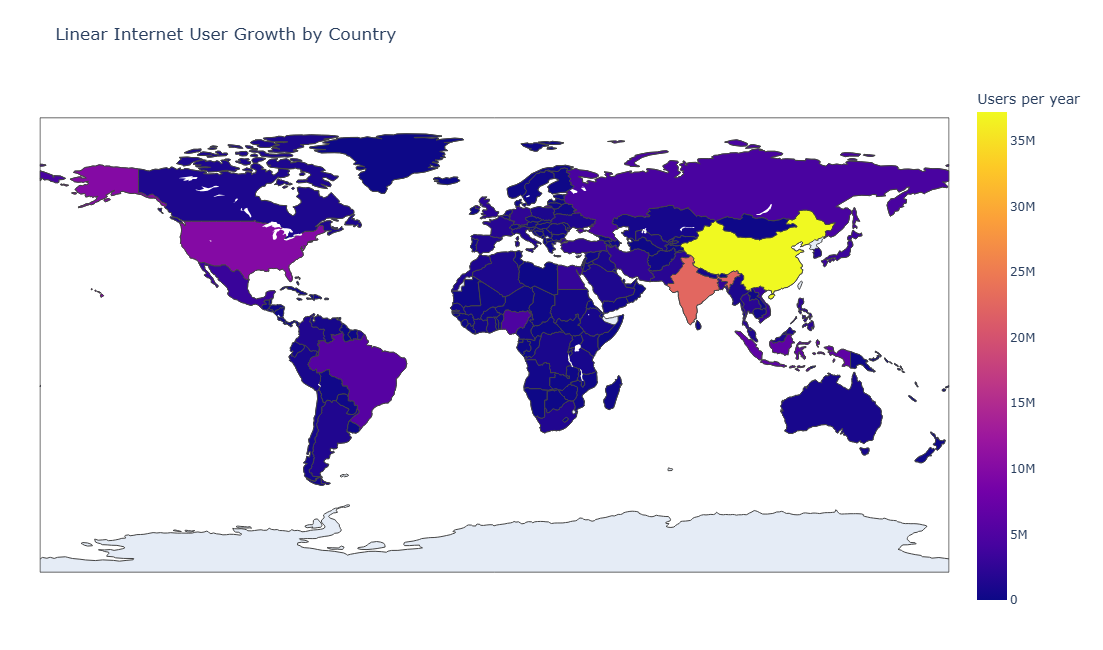

In [86]:
# Country-wise internet usage: Linear growth
# Filter country-level data
map_data = fastest_percent[fastest_percent['groups'] == 'country']

# Create choropleth map
fig = px.choropleth(
    map_data,
    locations='country',
    locationmode='country names',
    color='linear_growth',
    hover_name='country',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Linear Internet User Growth by Country',
    width=1100,    #  increase width
    height=650     #  increase height
)

# Improve layout spacing
fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    coloraxis_colorbar=dict(title='Users per year')
)

fig.show()


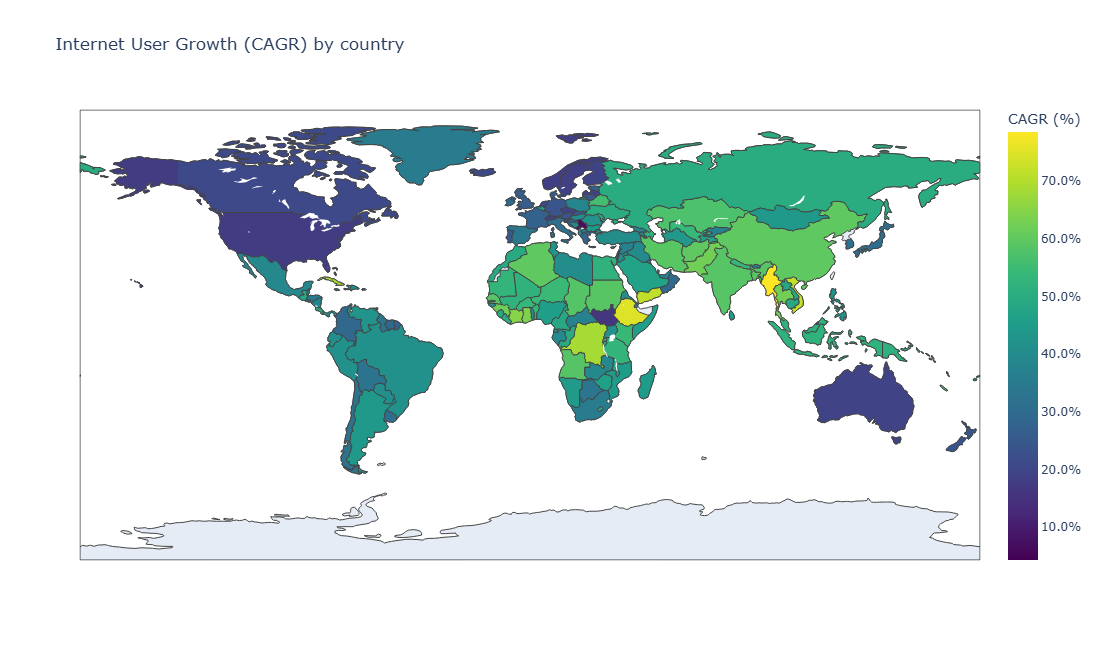

In [50]:
# Country-wise internet usage: Compound growth
# Filter country-level data
country_usage = fastest_percent[fastest_percent['groups'] == 'country']

# Drop missing CAGR values
country_usage = country_usage.dropna(subset=['cagr'])

# Select countries by CAGR
top = country_usage.sort_values('cagr', ascending=False)

# Create choropleth map
fig = px.choropleth(
    top,
    locations='country',
    locationmode='country names',
    color='cagr',
    hover_name='country',
    color_continuous_scale='Viridis',
    title='Internet User Growth (CAGR) by country',
    width=1100,
    height=650
)

# Improve colorbar and formatting
fig.update_layout(
    coloraxis_colorbar=dict(
        title='CAGR (%)',
        tickformat='.1%'
    )
)

fig.show()


# Findings
The figures show clear differences in internet growth across continents, countries, and income groups. Asia contributes the largest share of new internet users because of its large population, while Europe and North America add fewer users as their markets are closer to saturation. In contrast, Africa and South America show the fastest growth, indicating rapid expansion from later adoption. Similarly, lower- and lower-middle-income countries grow faster than high-income countries, where growth has slowed as these countries are close to saturation. Overall, the patterns suggest that future internet growth will be driven mainly by developing regions, even though developed regions already have high usage levels.

# Predicting the numbers of internet users, based on historical patterns, what might future internet adoption look like beyond 2021?

### Which model to use
The data shows that internet use was low in the 1990s, followed by rapid take-up in the 2000s, and then a slowdown as usage approached saturation. This creates an S-shaped pattern. The logistic sigmoid model fits this pattern well because it captures both the rapid take-up phase and the later saturation. Unlike straight-line or time-based models, it better represents how people adopt the internet and how growth slows once most people are already using it.


In [51]:
world_df.head(5)

,country,year,num_users,groups
6769,World,1990,2601283.5,special group
6770,World,1991,4270533.5,special group
6771,World,1992,6892746.5,special group
6772,World,1993,10009239.0,special group
6773,World,1994,20460824.0,special group


In [62]:
# Prepare the data
# Convert year into a time index 

# Sort just in case
world_df = world_df.sort_values("year")

# Time index starting at 0
world_df["t"] = world_df["year"] - world_df["year"].min()

# return as numpy array
x = world_df["t"].values
y = world_df["num_users"].values


In [54]:
## Define the logistic sigmoid function
# This is the S-curve:

def logistic_sigmoid(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

# Fit the model(K: saturation level, r: growth rate, t0: midpoint year)

## Assumption
For the logistic sigmoid model, K (saturation level) was initialised based on the approximate global population (~9 billion), r (growth rate) was chosen as 0.25 following typical technology adoption speeds reported in the literature, and t0 (inflection point) was set near the median year of the dataset. The final values of K, r, and t0 were estimated by nonlinear least squares fitting to the observed data.

### Ref
* Previous studies of global technology adoption suggest an average growth rate in the range 0.2–0.3 per year(Rogers, Diffusion of Innovations, 5th edition, 2003).
* The maximum possible number of users is bounded by the global population, currently ~8 billion(United Nations, World Population Prospects).

In [55]:
from scipy.optimize import curve_fit

K_init = 9e9        # appox to 9 billion 
r_init = 0.25
t0_init = np.median(x)

params, cov = curve_fit(
    logistic_sigmoid,
    x,
    y,
    p0=[K_init, r_init, t0_init],
    maxfev=20000
)

K, r, t0 = params

print(f"K (saturation): {K:,.0f}")
print(f"r (growth rate): {r:.3f}")
print(f"t0 (inflection): {world_df['year'].min() + t0:.1f}")


K (saturation): 7,030,546,366
r (growth rate): 0.162
t0 (inflection): 2016.3


In [63]:
# Extend 10 years into the future: y predicted
t_future = np.arange(0, x.max() + 11)

y_pred = logistic_sigmoid(t_future, K, r, t0)

pred_df = (
    world_df[["year"]]
    .drop_duplicates()
    .merge(
        pd.DataFrame({
            "year": world_df["year"].min() + t_future,
            "predicted_users": y_pred
        }),
        on="year",
        how="right"
    )
)


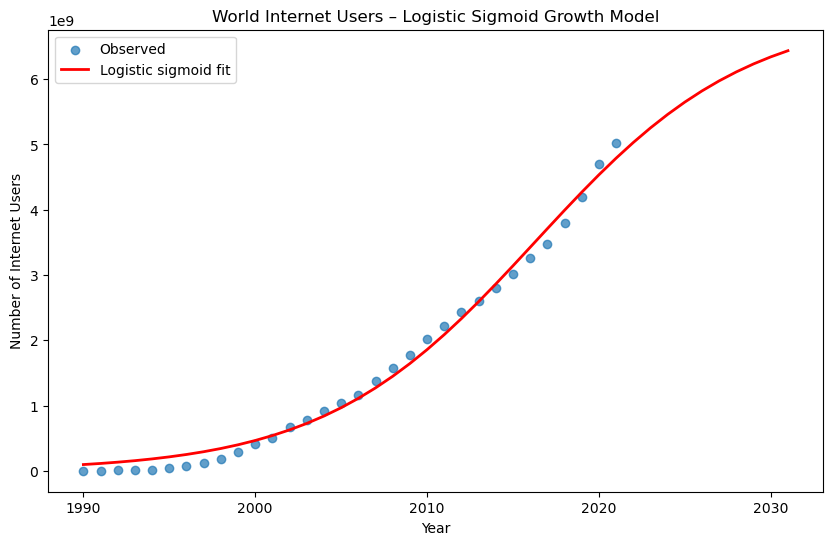

In [90]:
# Plot the sigmoid curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(world_df["year"], y, label="Observed", alpha=0.7)
plt.plot(
    world_df["year"].min() + t_future,
    y_pred,
    color="red",
    linewidth=2,
    label="Logistic sigmoid fit"
)

plt.xlabel("Year")
plt.ylabel("Number of Internet Users")
plt.title("World Internet Users – Logistic Sigmoid Growth Model")
plt.legend()
# plt.grid(True)
#plt.savefig("World Internet Users – Logistic  Growth Model")
plt.show()


In [68]:
# Model diagnostics
from sklearn.metrics import mean_squared_error

y_fitted = logistic_sigmoid(x, K, r, t0)
rmse = np.sqrt(mean_squared_error(y, y_fitted))
print("RMSE:", rmse)


RMSE: 131207083.79949145


On average, the logistic sigmoid model’s predictions differ by about 131 million internet users per year. For context, the real annual growth is around 200–300 million users per year (theglobalstatistics.com).
The 8% relative error (~400 million users) shows that the model’s predictions are reasonably close to reality, especially given the natural uncertainties in global population and internet adoption rates.

In [66]:
# Relative error
rmse / world_df["num_users"].mean()

0.08315611586942373

In [67]:
# MAPE (percentage error)
mape = np.mean(np.abs((y - y_fitted) / y)) * 100
print(f"MAPE: {mape:.2f}%")

#MAPE is 355.21%, this metric is inflated due to very small user counts in the early years of the dataset. 
#The RMSE of 131 million users and relative error of 8.3% indicate that the logistic model accurately captures overall growth 
#trends and provides reasonable forecasts for global internet adoption.

MAPE: 355.21%


## Conclusion 
The logistic sigmoid model shows an RMSE of approximately 131 million users and a relative error of about 8.3%, indicating a reasonably good fit to the historical data. When compared to real-world estimates for 2025, which report around 5.5–6 billion global internet users, the model’s forecast aligns closely with actual figures. This demonstrates that the logistic model not only captures the correct S-shaped pattern of adoption but also provides stable and reasonably accurate long-term predictions, making it suitable for understanding global internet growth trends.

### Ref
📌 **Statista reports** that as of February 2025, there were about **5.56 billion internet users worldwide**, representing around two‑thirds of the global population. ([Statista][1])

### END # LA